MILESTONE #3 - ML Exploration

In [175]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [63]:
df_holidays = pd.read_csv('holidays2020-US-CA-MX.csv')
#reading the data from the CSV created

Data Cleaning - Not required in this case....this data did not have any null values, etc, to begin with - the data was quite clean, as it was exported from an API with all values intact. 

Exploratory Data Analysis
#Summarizing main characterics of the dataset to see what it can tell us 

In [84]:
df_holidays.dtypes

name                        object
date                        object
observed                    object
public                        bool
country                     object
uuid                        object
weekday.date.name           object
weekday.date.numeric         int64
weekday.observed.name       object
weekday.observed.numeric     int64
dtype: object

Predictive Data Analysis - My prediction is that the most amount of holidays are in the winter season. 

We will explore the data and sort it into seasons, plus check it's accuracy via a regressor, to see if I am correct.

One Hot Encoding Example - via get_dummies

In [58]:
df_holidays_get_dummies = df_holidays[['weekday.observed.name']]
df_holidays_get_dummies = pd.get_dummies(df_holidays_get_dummies)
df_holidays_get_dummies.head()
#One Hot Encoding for the weekday observed name, to transform categorical data to numerical data, 1's and 0's

,weekday.observed.name_Friday,weekday.observed.name_Monday,weekday.observed.name_Saturday,weekday.observed.name_Sunday,weekday.observed.name_Thursday,weekday.observed.name_Tuesday,weekday.observed.name_Wednesday
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0


Feature Engineering - Create a new column

In [91]:
df_holidays['observed'] = pd.to_datetime(df_holidays.observed)
df_holidays.head()
#here I am converting the 'observed' column to a date time datatype
#when we do a .head() it appears nothing has changed....but move to the next step

,name,date,observed,public,country,uuid,weekday.date.name,weekday.date.numeric,weekday.observed.name,weekday.observed.numeric
0,New Year's Day,2020-01-01,2020-01-01,True,MX,cee56502-97a2-461b-a491-e82c145f6358,Wednesday,3,Wednesday,3
1,New Year's Day,2020-01-01,2020-01-01,True,US,82f78b8a-019e-479e-a19f-99040275f9bf,Wednesday,3,Wednesday,3
2,Seventh Day of Kwanzaa,2020-01-01,2020-01-01,False,US,0e766ff3-0d31-40e1-85e1-49ed61ab006d,Wednesday,3,Wednesday,3
3,New Year's Day,2020-01-01,2020-01-01,True,CA,1f9bc6e3-b71c-44cb-a62d-6453db68ec50,Wednesday,3,Wednesday,3
4,Epiphany,2020-01-06,2020-01-06,False,MX,e68fbdb6-2bac-4947-bb9f-93d5d0ca52ce,Monday,1,Monday,1


In [92]:
df_holidays.dtypes
#you can see that the 'observed' column is now a datetime data type!

name                                object
date                                object
observed                    datetime64[ns]
public                                bool
country                             object
uuid                                object
weekday.date.name                   object
weekday.date.numeric                 int64
weekday.observed.name               object
weekday.observed.numeric             int64
dtype: object

In [97]:
df_holidays.observed.dt.month
#testing parameters, seeing if month works

0       1
1       1
2       1
3       1
4       1
       ..
224    12
225    12
226    12
227    12
228    12
Name: observed, Length: 229, dtype: int64

In [100]:
df_holidays.observed.max() - df_holidays.observed.min()
#365 days between first dataframe and last dataframe - one year
#additional testing to ensure parameters work

Timedelta('365 days 00:00:00')

In [121]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
df = pd.DataFrame(data=months, columns=['Month'])
#creating test set

In [132]:
def find_season(month):
        season_month = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season_month.get(month)
#test set

In [133]:
season_list = []
for month in df['Month']:
    season = find_season(month)
    season_list.append(season)
    
df['Season'] = season_list
season_list
#testing test set

['Winter',
 'Winter',
 'Spring',
 'Spring',
 'Spring',
 'Summer',
 'Summer',
 'Summer',
 'Autumn',
 'Autumn',
 'Autumn',
 'Winter']

In [170]:
df_holidays['season'] = (df_holidays['observed'].dt.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

df_holidays['season_name'] = df_holidays['season'].map(seasons)
df_holidays.head()
#adding seasons column to dataframe
#setting parameters for season to map correctly with season number and season name

,name,date,observed,public,country,uuid,weekday.date.name,weekday.date.numeric,weekday.observed.name,weekday.observed.numeric,season,season_name
0,New Year's Day,2020-01-01,2020-01-01,True,MX,cee56502-97a2-461b-a491-e82c145f6358,Wednesday,3,Wednesday,3,1,Winter
1,New Year's Day,2020-01-01,2020-01-01,True,US,82f78b8a-019e-479e-a19f-99040275f9bf,Wednesday,3,Wednesday,3,1,Winter
2,Seventh Day of Kwanzaa,2020-01-01,2020-01-01,False,US,0e766ff3-0d31-40e1-85e1-49ed61ab006d,Wednesday,3,Wednesday,3,1,Winter
3,New Year's Day,2020-01-01,2020-01-01,True,CA,1f9bc6e3-b71c-44cb-a62d-6453db68ec50,Wednesday,3,Wednesday,3,1,Winter
4,Epiphany,2020-01-06,2020-01-06,False,MX,e68fbdb6-2bac-4947-bb9f-93d5d0ca52ce,Monday,1,Monday,1,1,Winter


In [172]:
df_holidays.head(40)
#testing to ensure that seasons change accurately
#as expected, on the date of 3/1/2020, the season changes to spring 

,name,date,observed,public,country,uuid,weekday.date.name,weekday.date.numeric,weekday.observed.name,weekday.observed.numeric,season,season_name
0,New Year's Day,2020-01-01,2020-01-01,True,MX,cee56502-97a2-461b-a491-e82c145f6358,Wednesday,3,Wednesday,3,1,Winter
1,New Year's Day,2020-01-01,2020-01-01,True,US,82f78b8a-019e-479e-a19f-99040275f9bf,Wednesday,3,Wednesday,3,1,Winter
2,Seventh Day of Kwanzaa,2020-01-01,2020-01-01,False,US,0e766ff3-0d31-40e1-85e1-49ed61ab006d,Wednesday,3,Wednesday,3,1,Winter
3,New Year's Day,2020-01-01,2020-01-01,True,CA,1f9bc6e3-b71c-44cb-a62d-6453db68ec50,Wednesday,3,Wednesday,3,1,Winter
4,Epiphany,2020-01-06,2020-01-06,False,MX,e68fbdb6-2bac-4947-bb9f-93d5d0ca52ce,Monday,1,Monday,1,1,Winter
5,Epiphany,2020-01-06,2020-01-06,False,US,61d8d9ba-8ce1-4e64-9b1a-f40d30f74a57,Monday,1,Monday,1,1,Winter
6,Orthodox Christmas Eve,2020-01-06,2020-01-06,False,US,bc893ac4-be85-4af6-abad-687e923bbcec,Monday,1,Monday,1,1,Winter
7,Orthodox Christmas Day,2020-01-07,2020-01-07,False,US,8ed029b2-c39d-46aa-b15a-4c67540380e4,Tuesday,2,Tuesday,2,1,Winter
8,Stephen Foster Memorial Day,2020-01-13,2020-01-13,False,US,099def58-4545-4468-bdbb-d370c7726189,Monday,1,Monday,1,1,Winter
9,Orthodox New Year's Day,2020-01-14,2020-01-14,False,US,4f7a5c31-18fa-4ffc-a47c-b889576ca002,Tuesday,2,Tuesday,2,1,Winter


<AxesSubplot:>

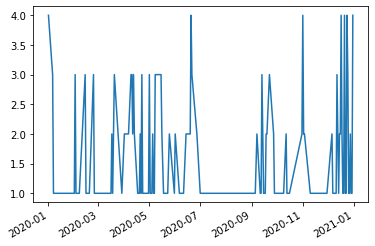

In [145]:
%matplotlib inline
df_holidays.observed.value_counts().sort_index().plot()
#to create a plot of holidays throughout the year
#Data Visualization

Testing Accuracy via Regressor

Testing my prediction that the winter season has the most holidays

In [203]:
from sklearn.model_selection import train_test_split

In [213]:
target = season['winter','spring','summer','fall']

TypeError: string indices must be integers

In [211]:
x = df_holidays.drop(['public', 'country', 'uuid', 'weekday.date.name', 'weekday.date.numeric', 'weekday.observed.name', 'weekday.observed.numeric'], axis = 'columns')
y = df_holidays.target

AttributeError: 'DataFrame' object has no attribute 'target'

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

NameError: name 'x' is not defined

In [210]:
len(x_train)
len(x_test)

NameError: name 'x_train' is not defined

Create KNN Classifier

In [215]:
from sklearn.neighbors import KNeighborsClassifier


In [216]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

ValueError: could not convert string to float: '2020-01-01'

In [217]:
knn.score(x_test,y_test)

NameError: name 'x_test' is not defined